# Part 1: Clustering the Online Retail Data

In [71]:
### IMPORTS ###
#Clustering
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from apyori import apriori

In [72]:
df = pd.read_csv('online_shoppers_intention.csv', na_filter=False)

In [73]:
# checking the shape of the data
df.shape

(12330, 18)

In [74]:
# describing the data

df.describe()

,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [75]:
# checking the datatypes of the data

df.dtypes

Administrative              object
Administrative_Duration     object
Informational               object
Informational_Duration      object
ProductRelated              object
ProductRelated_Duration     object
BounceRates                 object
ExitRates                   object
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [76]:
# taking out the information from the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null object
Administrative_Duration    12330 non-null object
Informational              12330 non-null object
Informational_Duration     12330 non-null object
ProductRelated             12330 non-null object
ProductRelated_Duration    12330 non-null object
BounceRates                12330 non-null object
ExitRates                  12330 non-null object
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(2)

## Task 1. Data Preparation for Clustering

### 1. Part 1: Can you identify data quality issues in this dataset such as unusual data types,missing values, etc?

ExitRates, ProductRelated_Duration, BounceRates, ProductRelated, Informational_Duration, Informational, Administrative_Duration, Administrative are of the type object in the dataframe, where the attribute information suggests that the values should be of the type int or float.

In [77]:
# print details for all variables in dataframe
def describeDataset(doc):
    """
    Print Details for each column
    """
    for cols in doc:
        print(df[cols].describe())
        print("-"*20)
        
describeDataset(df)

count     12330
unique       28
top           0
freq       5754
Name: Administrative, dtype: object
--------------------
count     12330
unique     3337
top           0
freq       5857
Name: Administrative_Duration, dtype: object
--------------------
count     12330
unique       18
top           0
freq       9686
Name: Informational, dtype: object
--------------------
count     12330
unique     1260
top           0
freq       9879
Name: Informational_Duration, dtype: object
--------------------
count     12330
unique      312
top           1
freq        625
Name: ProductRelated, dtype: object
--------------------
count     12330
unique     9553
top           0
freq        719
Name: ProductRelated_Duration, dtype: object
--------------------
count     12330
unique     1873
top           0
freq       5510
Name: BounceRates, dtype: object
--------------------
count     12330
unique     4778
top         0.2
freq        706
Name: ExitRates, dtype: object
--------------------
count    12330.

In [78]:
def describeDataset(doc):
    """
    Print Details for each column
    """
    for cols in doc:
        print(df[cols].value_counts())
        print("-"*20)
        
describeDataset(df)

0     5754
1     1354
2     1114
3      915
4      765
5      575
6      432
7      338
8      287
9      225
10     153
11     105
12      86
13      56
14      44
15      38
16      24
17      16
        14
18      12
19       6
24       4
22       4
23       3
20       2
21       2
27       1
26       1
Name: Administrative, dtype: int64
--------------------
0              5857
4                56
5                53
7                45
11               42
6                41
14               37
9                35
-1               33
15               33
10               32
13               29
19               29
12               28
21               28
8                26
3                26
18               26
20               25
17               25
23               24
37               24
33               20
26               20
34               19
32               19
16               19
47               19
28               18
29               18
               ... 
570.2666667     

Analysis of the .describe() output show a number of unusual results which may explain the cause of the mismatched data types.
For this output, top describes the most commonly occuring value in the dataset. For the fields ExitRates, ProductRelated_Duration, BounceRates, ProductRelated, Informational_Duration, Informational, Administrative_Duration, Administrative, that value appears to be an empty string.

In [79]:
# See  where ExitRates, ProductRelated_Duration, BounceRates, ProductRelated, Informational_Duration, Informational, Administrative_Duration, Administrative  contains empty string
mat_view = df[(df['ExitRates']=='')|(df['BounceRates']=='')|(df['ProductRelated_Duration']=='')|(df['ProductRelated']=='')|(df['Informational_Duration']=='')|(df['Informational']=='')|(df['Administrative_Duration']=='')|(df['Administrative']=='')].as_matrix()
print(mat_view)
print("Num Elements: ",len(mat_view))

[['' '' '' '' '' '' '' '' 0.0 0.0 'Mar' 2 2 2 1 'Returning_Visitor' False
  False]
 ['' '' '' '' '' '' '' '' 0.0 0.0 'Mar' 1 1 1 2 'Returning_Visitor' False
  False]
 ['' '' '' '' '' '' '' '' 0.0 0.0 'Mar' 2 4 5 1 'Returning_Visitor' False
  False]
 ['' '' '' '' '' '' '' '' 0.0 0.0 'Mar' 2 2 1 2 'Returning_Visitor' False
  False]
 ['' '' '' '' '' '' '' '' 0.0 0.0 'Mar' 3 2 1 1 'Returning_Visitor' False
  False]
 ['' '' '' '' '' '' '' '' 0.0 0.0 'Mar' 2 2 1 2 'Returning_Visitor' False
  False]
 ['' '' '' '' '' '' '' '' 0.0 0.0 'Mar' 2 2 1 1 'Returning_Visitor' True
  False]
 ['' '' '' '' '' '' '' '' 0.0 0.0 'Mar' 1 1 6 1 'Returning_Visitor' True
  False]
 ['' '' '' '' '' '' '' '' 0.0 0.0 'Mar' 2 2 3 1 'Returning_Visitor' False
  False]
 ['' '' '' '' '' '' '' '' 0.0 0.0 'Mar' 1 1 2 3 'Returning_Visitor' False
  False]
 ['' '' '' '' '' '' '' '' 0.0 0.0 'Mar' 3 2 4 1 'Returning_Visitor' False
  False]
 ['' '' '' '' '' '' '' '' 0.0 0.0 'Mar' 2 2 1 2 'Returning_Visitor' False
  False]
 ['' '

c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


#### missing value

As seen above, 14 roWs in the dataset contain empty string values for ExiteRates, BounceRates, ProductRelated_Duration, Information_Duration, Administrative_Duration, ProductRelated, Informational, Administrative. This additionally idenotifies 14 rows where the 

In [81]:
# Clean and return dataset
def cleanAndConvertDataset1(doc):
    # replace empty elements with np.nan and cast fields to float 
    return df[['ExitRates','BounceRates','ProductRelated_Duration','Informational_Duration','Administrative_Duration','ProductRelated','Informational','Administrative']].replace('',np.nan).astype(float)


df = cleanAndConvertDataset1(df)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 8 columns):
ExitRates                  12316 non-null float64
BounceRates                12316 non-null float64
ProductRelated_Duration    12316 non-null float64
Informational_Duration     12316 non-null float64
Administrative_Duration    12316 non-null float64
ProductRelated             12316 non-null float64
Informational              12316 non-null float64
Administrative             12316 non-null float64
dtypes: float64(8)
memory usage: 770.7 KB


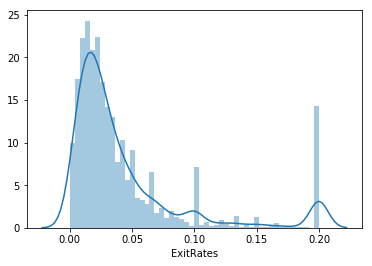

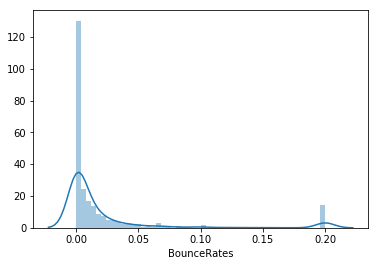

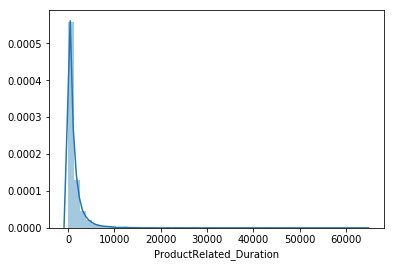

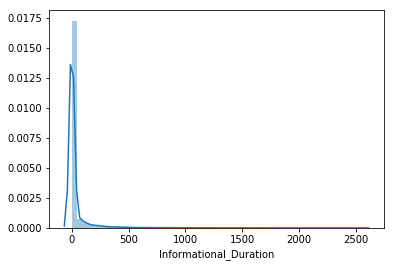

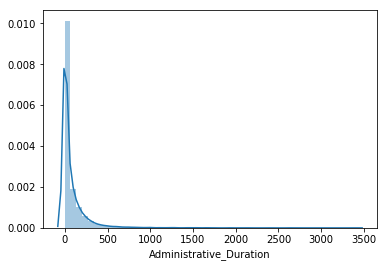

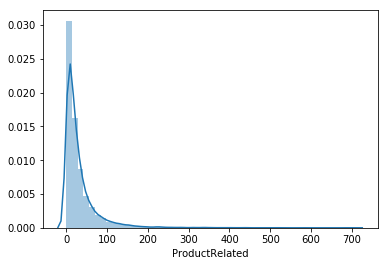

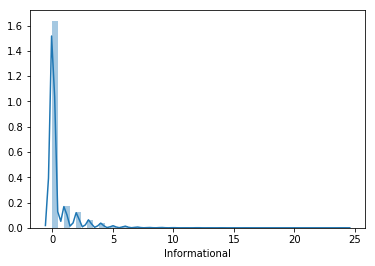

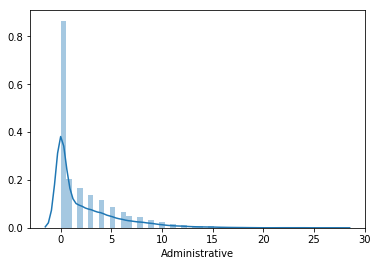

In [82]:
# Distribution of ExitRates
ute_dist = sns.distplot(df['ExitRates'].dropna())
plt.show()

# Distribution of BounceRates
hatch_dist = sns.distplot(df['BounceRates'].dropna())
plt.show()

# Distribution of ProductRelated_Duration
wagon_dist = sns.distplot(df['ProductRelated_Duration'].dropna())
plt.show()

# Distribution of Informational_Duration
sedan_dist = sns.distplot(df['Informational_Duration'].dropna())
plt.show()

# Distribution of Administrative_Duration
sedan_dist = sns.distplot(df['Administrative_Duration'].dropna())
plt.show()

# Distribution of ProductRelated
sedan_dist = sns.distplot(df['ProductRelated'].dropna())
plt.show()

# Distribution of Informational
sedan_dist = sns.distplot(df['Informational'].dropna())
plt.show()

# Distribution of Administrative
sedan_dist = sns.distplot(df['Administrative'].dropna())
plt.show()



Outliners????

### 2. What variables did you include in the analysis and what were their roles and measurement level set? Justify your choice. Answer this question for each of the tasks 2 and 3.